In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Load Data ---
df = pd.read_csv("StudentPerformance.csv")

In [3]:
# --- Data Cleaning ---
# Fill missing categorical with mode
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\pcc\AppData\Local\Temp\ipykernel_324\3266963837.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [4]:
# Encode Yes/No to 1/0
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
df['Internet_Access'] = df['Internet_Access'].map({'Yes': 1, 'No': 0})
df['Learning_Disabilities'] = df['Learning_Disabilities'].map({'Yes': 1, 'No': 0})

In [5]:
# --- 1. Summary Stats ---
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Hours_Studied   Attendance  Extracurricular_Activities  Sleep_Hours  \
count    6607.000000  6607.000000                 6607.000000   6607.00000   
mean       19.975329    79.977448                    0.596035      7.02906   
std         5.990594    11.547475                    0.490728      1.46812   
min         1.000000    60.000000                    0.000000      4.00000   
25%        16.000000    70.000000                    0.000000      6.00000   
50%        20.000000    80.000000                    1.000000      7.00000   
75%        24.000000    90.000000                    1.000000      8.00000   
max        44.000000   100.000000                    1.000000     10.00000   

       Previous_Scores  Internet_Access  Tutoring_Sessions  Physical_Activity  \
count      6607.000000      6607.000000        6607.000000        6607.000000   
mean         75.070531         0.924474           1.493719           2.967610   
std          14.399784         0

**Observations from the summary statistics:**

1. **Hours Studied**: Students study on average ~20 hours, with most between 16–24 hours.
2. **Attendance**: Average attendance is ~80%, ranging from 60–100%.
3. **Extracurricular Activities**: About 60% of students participate.
4. **Sleep Hours**: Students sleep ~7 hours daily, ranging between 4–10 hours.
5. **Previous Scores**: Average past score is ~75, with a range of 50–100.
6. **Internet Access**: ~92% of students have internet access.
7. **Tutoring Sessions**: Students attend ~1–2 tutoring sessions on average, with some up to 8.
8. **Physical Activity**: Students engage in ~3 hours of physical activity weekly.
9. **Learning Disabilities**: About 10% of students reported having learning disabilities.
10. **Exam Score**: Average exam score is ~67, most students score between 65–69.

Notably, there is an outlier in **Exam Score** (maximum = 101), which seems unusual.

In [6]:
# Treatment of Outlier

# Remove outliers
df = df[df['Exam_Score'] != 101]

In [7]:
# --- 2. Correlation with Exam Score ---
correlation = df.corr(numeric_only=True)['Exam_Score'].sort_values(ascending=False)
print("\nCorrelation with Exam Score:\n", correlation)


Correlation with Exam Score:
 Exam_Score                    1.000000
Attendance                    0.582458
Hours_Studied                 0.446514
Previous_Scores               0.174461
Tutoring_Sessions             0.153754
Extracurricular_Activities    0.063667
Internet_Access               0.056447
Physical_Activity             0.027943
Sleep_Hours                  -0.016194
Learning_Disabilities        -0.085103
Name: Exam_Score, dtype: float64


**Observations** from the correlation with **Exam Score**:

1. **Attendance (0.58)** has the strongest positive impact on exam scores.
2. **Hours Studied (0.45)** also shows a strong positive correlation.
3. **Previous Scores (0.17)** and **Tutoring Sessions (0.15)** have weak positive effects.
4. **Extracurricular Activities, Internet Access, and Physical Activity** show very weak positive correlation.
5. **Sleep Hours (-0.017)** has almost no effect, slightly negative.
6. **Learning Disabilities (-0.085)** has a weak negative correlation with exam scores.

Overall, **attendance and study hours are the main factors linked to better exam scores**.

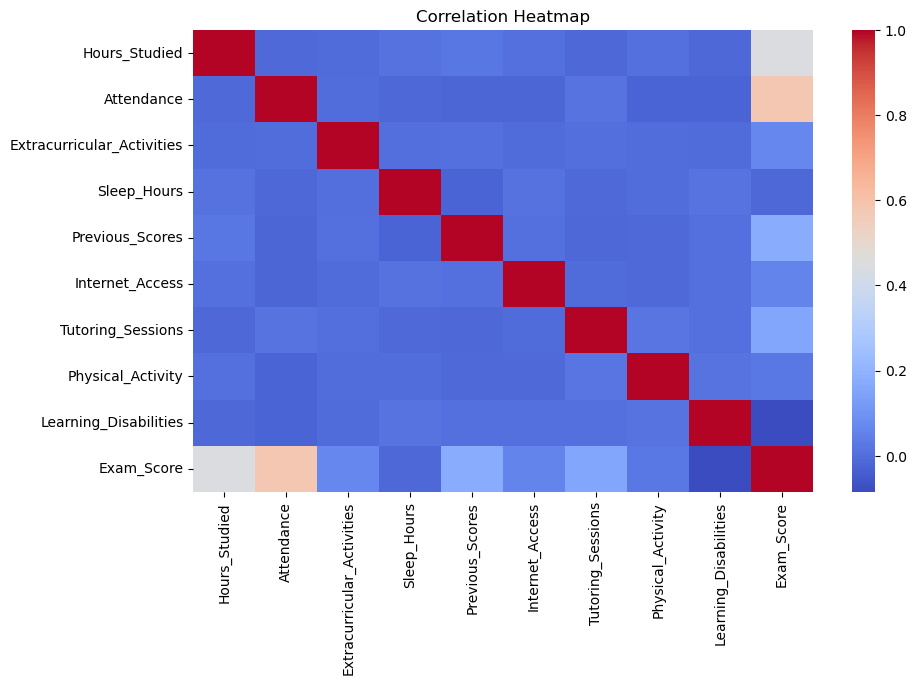

In [8]:
# Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Observation** :- 
- The heatmap shows that **Exam Score is most positively correlated with Attendance and Hours Studied**, while other factors have weak or negligible relationships.

In [9]:
# --- 3. Grouped Averages ---
categorical_cols = [
    "Parental_Involvement", "Family_Income", "Teacher_Quality", "School_Type",
    "Peer_Influence", "Parental_Education_Level", "Distance_from_Home", "Gender"
]

In [10]:
for col in categorical_cols:
    means = df.groupby(col)["Exam_Score"].mean().sort_values(ascending=False)
    print(f"\nAverage Exam Score by {col}:\n", means)


Average Exam Score by Parental_Involvement:
 Parental_Involvement
High      68.092767
Medium    67.098156
Low       66.332335
Name: Exam_Score, dtype: float64

Average Exam Score by Family_Income:
 Family_Income
High      67.816246
Medium    67.334959
Low       66.848428
Name: Exam_Score, dtype: float64

Average Exam Score by Teacher_Quality:
 Teacher_Quality
High      67.659815
Medium    67.100175
Low       66.753425
Name: Exam_Score, dtype: float64

Average Exam Score by School_Type:
 School_Type
Private    67.287705
Public     67.205569
Name: Exam_Score, dtype: float64

Average Exam Score by Peer_Influence:
 Peer_Influence
Positive    67.610542
Neutral     67.197917
Negative    66.564270
Name: Exam_Score, dtype: float64

Average Exam Score by Parental_Education_Level:
 Parental_Education_Level
Postgraduate    67.970881
College         67.315737
High School     66.887681
Name: Exam_Score, dtype: float64

Average Exam Score by Distance_from_Home:
 Distance_from_Home
Near        67.49

**Observations from the output:**

1. **Distance from Home** – Students living **near home** score slightly higher than those far away.
2. **Gender** – Scores are almost the same for **male and female** students.
3. **Peer Influence** – Students with **positive peer influence** perform better.
4. **Parental Education** – Higher parental education (postgraduate) is linked to higher scores.
5. **Parental Involvement** – High parental involvement results in the **highest scores**.
6. **Family Income** – Higher family income is associated with slightly better scores.
7. **Teacher Quality** – Better teacher quality improves scores.
8. **School Type** – Private and public school students perform almost the same.

Overall, **parental involvement, teacher quality, and positive peer influence** seem to have the strongest impact on higher exam scores.

C:\Users\pcc\AppData\Local\Temp\ipykernel_324\943903362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette="viridis")


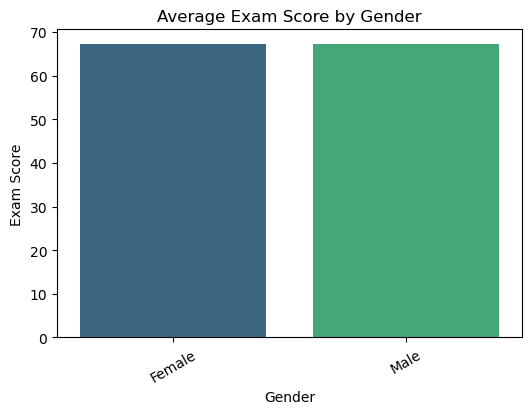

In [11]:
    # Bar chart
    plt.figure(figsize=(6,4))
    sns.barplot(x=means.index, y=means.values, palette="viridis")
    plt.title(f"Average Exam Score by {col}")
    plt.ylabel("Exam Score")
    plt.xticks(rotation=30)
    plt.show()

**Obervation** :- The chart shows that both males and females have nearly the same average exam score, with only a very small difference.

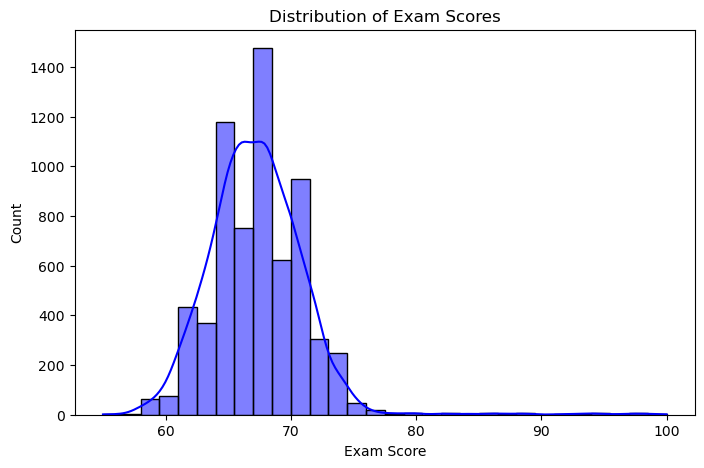

In [12]:
# --- 4. Distribution of Exam Scores ---
plt.figure(figsize=(8,5))
sns.histplot(df["Exam_Score"], bins=30, kde=True, color="blue")
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

**Obervation** :- Most exam scores are clustered between 65 and 70, forming a roughly normal distribution with few very low or very high scores.